In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tqdm
import multiprocessing as mp
from config import *

path = result_parent_directory + os.sep + 'step4a_btms_sizing_sensitivity_c_rate'

result_directory = path + os.sep + 'analysis'
os.makedirs(result_directory, exist_ok=True)
figure_directory = path + os.sep + 'figures'
os.makedirs(figure_directory, exist_ok=True)

sizing_results_path = os.path.join(path, 'sizing_results')

load results 

In [2]:
# load all results from path to list and add taz name as df name
sizing_results = []
sizing_results_params = []
for folder in os.listdir(sizing_results_path):
    sizing_results_one_param_combination = []
    for file in os.listdir(sizing_results_path + os.sep + folder):
        if file.startswith('btms_sizing'):
            if file.endswith(".csv"):
                df0 = pd.read_csv(os.path.join(sizing_results_path, folder, file), index_col=0)
                name = file.split('.')[0]
                #remove btms_sizing from name
                df0.name = name.split('_')[2]
                sizing_results_one_param_combination.append(df0)
    sizing_results.append(sizing_results_one_param_combination)

In [3]:
for combination in sizing_results:
    print(combination[0].columns[-1])
#recognize parameters for each result in sizing_results
sizing_results_params = []
for x in sizing_results:
    df0 = x[0]
    a = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][1]
    b_sys = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][2]
    b_cap = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][3]
    b_loan = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][4]
    c = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][5]
    param_dict= {'a': [a], 'b_sys': [b_sys], 'b_cap': [b_cap], 'b_loan':[b_loan], 'c': [c]}
    sizing_results_params.append(pd.DataFrame(param_dict))

param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c


In [4]:
#
df_params = pd.concat(sizing_results_params, axis=0)
df_params.index = df_params['a'] * 365/12
#df_params.sort_index(inplace=True)
df_params.index.argmax()

3

In [5]:
# create a list of all a values
a_values = []
for x in sizing_results_params:
    a_values.append(x['a'].values[0])
# create an idx list for sorting
a_values_idx = np.argsort(a_values)
# sort sizing_results and sizing_results_params
sizing_results = [sizing_results[i] for i in a_values_idx]
sizing_results_params = [sizing_results_params[i] for i in a_values_idx]

In [6]:
# show all a values multiplied by 365/12
a_values = [x['a'].values[0] for x in sizing_results_params]
a_values = [x*365/12 for x in a_values]
# round to 2 decimal places
a_values = [round(x, 2) for x in a_values]
print(a_values)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]


In [7]:
from functions.stats_sizing_function import stats_sizing_function
# create df with stats for each parameter combination and each taz
stats_per_param_combination_list = []
for sizing_results_one_param_combination in sizing_results:
    stats = pd.DataFrame()
    for df0 in sizing_results_one_param_combination:
        stats = stats.append(pd.DataFrame(stats_sizing_function(df0, timestep), index=[df0.name]))
    stats_per_param_combination_list.append(stats)

In [8]:
stats_per_param_combination = pd.concat(stats_per_param_combination_list, keys=a_values)

In [16]:
# show stats for a = 1
stats_per_param_combination.loc[10].describe()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b_loan,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,...,share_cost_b_loan,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio,grid_peak_to_charge_peak_ratio
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,288.615678,11.852301,19.817360,14.954810,6.035374,34.772170,11.645283,58.269755,0.183506,0.369020,...,0.101552,0.620652,0.195842,683.684094,1.639622,1.906685,0.863682,0.967052,18.993906,0.073166
std,102.092595,9.952876,7.730321,6.976650,2.815595,12.750375,5.454396,25.807944,0.064424,0.124843,...,0.018229,0.087013,0.035163,441.610667,0.417400,0.723377,0.099374,0.094734,15.272600,0.049376
min,71.575190,0.708325,6.189802,1.188625,0.479698,9.841876,0.920612,14.922015,0.045127,0.111183,...,0.030561,0.356891,0.058651,44.000000,0.538805,0.293285,0.332483,0.543785,2.215141,0.007182
25%,214.685203,6.094913,12.349002,9.562589,3.859213,24.131608,7.445391,40.264988,0.148746,0.283222,...,0.092444,0.565844,0.178409,382.416667,1.322806,1.453580,0.834505,0.999999,10.005262,0.043052
50%,289.383959,10.354989,20.797221,15.527900,6.266658,35.004584,12.019687,57.510346,0.173455,0.358881,...,0.104072,0.620570,0.200039,651.916667,1.838841,1.753991,0.878088,1.000000,15.811349,0.059484
75%,346.263710,13.975268,24.575555,19.771272,7.979173,43.258603,15.332778,72.907607,0.204683,0.443602,...,0.113809,0.667742,0.218996,878.083333,2.000000,2.268342,0.929953,1.000000,22.227505,0.090866
max,599.999996,78.904178,51.887831,43.726170,17.646749,95.614001,34.701470,179.630542,0.509234,0.820496,...,0.133640,0.896222,0.263156,2957.166667,2.000000,5.228914,0.992655,1.000000,138.244276,0.311028


In [17]:
stats_per_param_combination.loc[1].describe()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b_loan,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,...,share_cost_b_loan,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio,grid_peak_to_charge_peak_ratio
count,1.570000e+02,157.000000,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,157.000000,1.570000e+02,1.570000e+02,...,1.570000e+02,1.570000e+02,1.570000e+02,157.000000,157.000000,157.000000,1.570000e+02,157.000000,1.570000e+02,1.570000e+02
mean,2.150460e-05,16.253032,2.487541e-07,7.553066e-08,3.048222e-08,3.242848e-07,5.873595e-08,16.253032,1.000000e+00,1.402738e-08,...,1.986013e-09,1.894844e-08,3.824919e-09,683.684094,0.275174,0.159803,5.765279e-09,0.058654,1.066549e-08,1.000000e+00
std,2.833521e-05,6.327021,3.542219e-07,8.903281e-08,3.593133e-08,4.344520e-07,6.917461e-08,6.327021,2.889314e-08,1.954851e-08,...,2.492700e-09,2.464378e-08,4.794713e-09,441.610667,0.185754,0.089765,9.428552e-09,0.031446,1.486339e-08,1.487212e-08
min,4.102434e-07,4.931507,3.961911e-10,1.185583e-09,4.784707e-10,1.581774e-09,9.207066e-10,4.931507,9.999999e-01,4.016938e-11,...,4.851161e-11,1.603744e-10,9.334941e-11,44.000000,0.006919,0.029606,7.548367e-11,0.006115,3.054212e-11,9.999999e-01
25%,3.273650e-06,9.863014,2.482253e-08,1.261919e-08,5.092778e-09,4.329738e-08,9.793991e-09,9.863014,1.000000e+00,2.004267e-09,...,3.058168e-10,3.012947e-09,5.936729e-10,382.416667,0.111283,0.093620,7.706599e-10,0.037202,1.523911e-09,1.000000e+00
50%,1.181226e-05,16.438356,8.931673e-08,3.407932e-08,1.375353e-08,1.297580e-07,2.645436e-08,16.438357,1.000000e+00,5.308190e-09,...,1.033541e-09,8.770683e-09,1.986367e-09,651.916667,0.258328,0.133456,2.803799e-09,0.051494,4.035994e-09,1.000000e+00
75%,3.041009e-05,19.726027,3.422878e-07,9.404588e-08,3.795448e-08,4.462099e-07,7.344444e-08,19.726028,1.000000e+00,1.735209e-08,...,2.565442e-09,2.368776e-08,4.964300e-09,878.083333,0.398341,0.220765,6.061958e-09,0.075224,1.319337e-08,1.000000e+00
max,1.900395e-04,44.383561,1.885332e-06,4.290987e-07,1.731731e-07,2.314431e-06,3.328877e-07,44.383562,1.000000e+00,9.557587e-08,...,1.389298e-08,1.173288e-07,2.671549e-08,2957.166667,0.796062,0.446217,6.538941e-08,0.186652,7.266954e-08,1.000000e+00


In [18]:
stats_per_param_combination.loc[0].columns

Index(['btms_size', 'cost_a', 'cost_b_sys', 'cost_b_cap', 'cost_b_loan',
       'cost_b', 'cost_c', 'cost_total', 'share_cost_a', 'share_cost_b_sys',
       'share_cost_b_cap', 'share_cost_b_loan', 'share_cost_b', 'share_cost_c',
       'E_Charge', 'c_rate', 'cycles_day', 'btms_ratio', 'load_factor',
       'btms_peak_to_grid_ratio', 'grid_peak_to_charge_peak_ratio'],
      dtype='object')

Text(0.5, 1.0, 'btms peak to grid ratio for each a value')

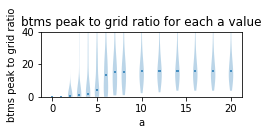

In [35]:
# get btms peak to grid ratio mean and std for each a value
btms_peak_to_grid_ratio_mean = []
btms_peak_to_grid_ratio_std = []
# for a in a_values:
#     btms_peak_to_grid_ratio_mean.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].mean())
#     btms_peak_to_grid_ratio_std.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].std())

# plot btms peak to grid ratio mean and std for each a value
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.errorbar(a_values, btms_peak_to_grid_ratio_mean, yerr=btms_peak_to_grid_ratio_std, fmt='o')
# ax.set_xlabel('a')
# ax.set_ylabel('btms peak to grid ratio')
# ax.set_title('btms peak to grid ratio mean and std for each a value')

# plot violin plot for btms peak to grid ratio for each a value
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(plotSizeX, plotSizeY))
x = stats_per_param_combination['btms_peak_to_grid_ratio']
dists = [stats_per_param_combination.loc[i]['btms_peak_to_grid_ratio'] for i in a_values]
ax.violinplot(dists, a_values, showmeans=False, showextrema=False, showmedians=True)
ax.set_xlabel('a')
ax.set_ylim(0, 40)
ax.set_ylabel('btms peak to grid ratio')
ax.set_title('btms peak to grid ratio for each a value')


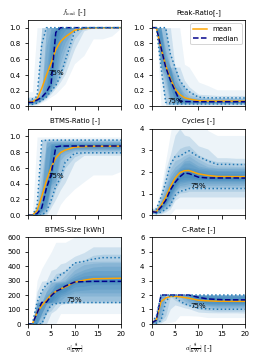

In [38]:
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =1
pltSettings()
fig, ax_arr = plt.subplots(3, 2, figsize=(zoom*plotSizeX, zoom*4.2*plotSizeY), sharex=True, sharey=False)
ax = ax_arr.flatten()

def plot_mean_median_color_area(ax, column, alpha):
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).mean(), label='mean', color='orange')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).median(), label='median', color='darkblue', linestyle='--')
    for i in np.arange(0, 1, 0.05):
        ax.fill_between(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(i), stats_per_param_combination.loc[:, column].groupby(level=0).quantile(1-i), alpha=alpha,  color='C0', linewidth=0, rasterized=True)
    # add lines for 12.5% and 87.5% quantile
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125), color='C0', linestyle=':')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.875), color='C0', linestyle=':')
    # add text for 12.5% and 87.5% quantile
    # mark area with 75%
    if column == 'load_factor':
        x = 6
    elif column == 'btms_ratio':
        x = 6
    elif column == 'cost_a':
        x = 13
    elif column == 'grid_peak_to_charge_peak_ratio':
        x = 5
    else:
        x = 10
    y = stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125).values[x+1]
    ax.text(x,y, '75%', horizontalalignment='center', verticalalignment='bottom') #, transform=ax.transAxes)
    # add x and y label
    #ax.set_ylabel(column)
    # add legend
    #ax.legend()
    ax.set_xlim(0, 20)

alpha = 0.08
plot_mean_median_color_area(ax[2], 'btms_ratio', alpha)
plot_mean_median_color_area(ax[5], 'c_rate', alpha)
plot_mean_median_color_area(ax[0], 'load_factor', alpha)
plot_mean_median_color_area(ax[3], 'cycles_day', alpha)
plot_mean_median_color_area(ax[4], 'btms_size', alpha)
plot_mean_median_color_area(ax[1], 'grid_peak_to_charge_peak_ratio', alpha)
           
# ax0
ax[2].set_ylim(0, 1.1)
ax[2].set_title('BTMS-Ratio [-]', fontsize = 7)
# ax1
ax[5].set_ylim(0, 6)
ax[5].set_title('C-Rate [-]', fontsize = 7)
# plot legend with rectangular shape
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7)

# ax2
ax[0].set_ylim(0, 1.1)
ax[0].set_title(r'$f_\mathrm{load}$ [-]', fontsize = 7)
ax[1].legend(loc = 'upper right', fontsize = 7)
# ax3
ax[3].set_ylim(0, 4)
ax[3].set_title('Cycles [-]', fontsize = 7)

# ax4
ax[4].set_ylim(0, 600)
ax[4].set_title('BTMS-Size [kWh]', fontsize = 7)
ax[4].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
# ax5
ax[1].set_ylim(0, 1.1)
ax[1].set_title('Peak-Ratio[-]', fontsize = 7)
ax[5].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$ [-]')

fig.tight_layout()

# save plot
fig.savefig(os.path.join(figure_directory, 'step4a_stats_per_a_value.pdf'), dpi=300, bbox_inches='tight')

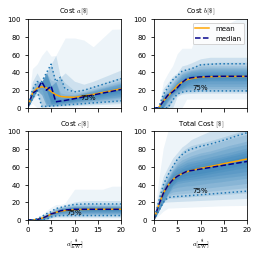

In [36]:
%matplotlib inline
plot_cols = ['cost_a','cost_b', 'cost_c', 'cost_total']
col_titles = [r'Cost $a [\$]$', r'Cost $b [\$]$', r'Cost $c [\$]$', r'Total Cost $[\$]$']
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =1
pltSettings()
fig, ax_arr = plt.subplots(2,2, figsize=(zoom*plotSizeX, zoom*2*1.5*plotSizeY), sharex=True, sharey=False)
ax = ax_arr.flatten()

for i, col in enumerate(plot_cols):
    plot_mean_median_color_area(ax[i], col, alpha)
    ax[i].set_title(col_titles[i], fontsize = 7)

ax[0].set_ylim(0,100)
ax[1].legend(loc = 'upper right', fontsize = 7)
ax[1].set_ylim(0,100)
ax[2].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
ax[2].set_ylim(0,100)
ax[3].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
ax[3].set_ylim(0,100)


fig.tight_layout()
plt.show()

# export to pdf
fig.savefig(os.path.join(figure_directory, 'step4a_costs_per_a.pdf'), dpi=300, bbox_inches='tight')

In [ ]:
a_values

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0]

In [ ]:
# print trajectories for a = 3
a = 5
sizing_results_a_choosen = sizing_results[a+1]

# plot results
from tqdm import tqdm
for df in tqdm(sizing_results_a_choosen):
    pltSettings()
    # use seaborn style
    plt.style.use('seaborn')
    # box around legend
    plt.rcParams['legend.frameon'] = True
    fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [2, 1]} )
    time_in_h = df['time']/3600
    stats_i = stats_sizing_function(df, timestep)

    btms_size = df['param: btms size, a,b_sys,b_cap,b_loan,c'].iloc[0]

    ax[0].step(time_in_h, df['P_BTMS'], label=r'$P_\Theta$')
    ax[0].step(time_in_h, df['P_Charge'], label=r'$P_{Charge}$')
    ax[0].step(time_in_h, df['P_Grid'], label=r'$P_{Grid}$')
    ax[0].set_title('Power usage at ' + df.name)
    ax[0].set_ylabel('Power [kW]')
    ax[0].set_ylim(-1000, 1000)
    # legend outside of plot
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].plot(time_in_h, df['E_BTMS'] - df['E_BTMS'].min(), label=r'$E_\Theta$')
    ax[1].hlines(btms_size, 0, max(time_in_h), label='BTMS-Size', linestyles='dashed')
    ax[1].set_ylabel('Energy [kWh]')
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].set_xlabel('Time [h]')
    ax[1].set_xlim(0, max(time_in_h))

    # add text box with informations, costs and sizing results
    textstr1 = '\n'.join([
        r'$cost_{a}= \$ %.2f$' % stats_i['cost_a'],
        r'$cost_{b}= \$ %.2f$' % stats_i['cost_b'],
        r'$cost_{c}= \$ %.2f$' % stats_i['cost_c'],
        r'$cost_{total}= \$ %.2f$' % stats_i['cost_total'],])
    textstr2 = '\n'.join([
        r'$BTMS-Size =%.2f$ kWh' % stats_i['btms_size'],
        r'$\max{P_{\Theta}}=%.2f$ kW' % df['P_BTMS'].abs().max(),
        r'$\max{P_{Grid}}=%.2f$ kW' % df['P_Grid'].max(),
        r'C-Rate: %.2f' % stats_i['c_rate'],
        r'Cycles: %.2f' % stats_i['cycles_day'],
        r'BTMS-Ratio: %.2f' % stats_i['btms_ratio'],
        r'Load-Factor(Grid): %.2f' % stats_i['load_factor'],
        ])
    textstr = '\n'.join([
        textstr1, 
        textstr2])
    
    # add text under legend of first plot
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[0].text(1.05, 0.10, textstr, transform = ax[0].transAxes, fontsize = 10, bbox=props, va='bottom', ha='left')
    os.makedirs(os.path.join(figure_directory, 'a ' + str(a)), exist_ok=True)
    plt.savefig(os.path.join(figure_directory, 'a ' + str(a), df.name + '_btms_sizing.png'), dpi=300, bbox_inches='tight')
    plt.close()

100%|██████████| 157/157 [03:28<00:00,  1.33s/it]


## reduce charging stations and save btms sizes for each taz

In [9]:
a = 5.0
a_idx = np.where(np.array(a_values) == a)[0][0]

sizing_results_a_choosen = sizing_results[a_idx]

second requirement: btms soc should be > 0.7 after holding P_Grid_max for 0.5 hour

In [10]:
stats_per_param_combination.loc[a_idx]

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b_loan,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,...,share_cost_b_loan,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio,grid_peak_to_charge_peak_ratio
1008,286.648947,4.389387,24.789320,13.604736,5.490519,38.394056,10.533649,53.317093,0.082326,0.464941,...,0.102979,0.720108,0.197566,552.625000,2.0,1.744099,0.904672,1.000000,21.470137,0.044504
1013,104.999795,14.794588,9.080353,11.947528,4.821713,21.027881,9.246104,45.068573,0.328268,0.201479,...,0.106986,0.466575,0.205156,658.416667,2.0,4.181745,0.666876,0.340729,2.333318,0.300001
1033,292.028999,2.620603,25.254586,8.330983,3.362169,33.585569,6.451071,42.657243,0.061434,0.592035,...,0.078818,0.787336,0.151230,328.583333,2.0,1.048319,0.931695,1.000000,36.636427,0.026570
1034,240.486682,3.127666,20.797221,9.997781,4.034845,30.795002,7.741929,41.664597,0.075068,0.499158,...,0.096841,0.739117,0.185816,391.805556,2.0,1.527686,0.937680,0.999999,25.278950,0.038053
1035,289.913093,3.316244,25.071603,10.568240,4.265068,35.639843,8.183568,47.139655,0.070349,0.531858,...,0.090477,0.756048,0.173603,415.638889,2.0,1.339545,0.934349,1.000000,28.741524,0.033623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,224.999999,24.657535,19.457937,10.981943,4.432027,30.439879,8.510392,63.607806,0.387650,0.305905,...,0.069677,0.478556,0.133795,951.180556,2.0,1.793333,0.424210,0.284114,3.000000,0.250000
978,225.000003,24.657534,19.457937,9.602477,3.875311,29.060413,7.444238,61.162186,0.403150,0.318137,...,0.063361,0.475137,0.121713,795.041667,2.0,1.567963,0.443740,0.238242,3.000000,0.250000
985,285.524187,4.759172,24.692051,13.449304,5.427790,38.141355,10.415709,53.316236,0.089263,0.463124,...,0.101804,0.715380,0.195357,541.500000,2.0,1.730895,0.912673,0.904863,19.724223,0.048253
992,225.000001,24.657534,19.457937,6.756762,2.726854,26.214699,5.232053,56.104285,0.439495,0.346817,...,0.048603,0.467249,0.093256,622.291667,2.0,1.103519,0.398996,0.185099,3.000000,0.250000


In [11]:
idx = stats_per_param_combination.loc[a_idx]['load_factor']< 0.7
representing = sum(idx) / len(stats_per_param_combination.loc[a_idx]['load_factor'])

print('number of cases with load factor < 0.7: %.2f' % representing)

number of cases with load factor < 0.7: 0.59


In [12]:
# get only cases with a notable btms size
idx2 = stats_per_param_combination.loc[a_idx]['btms_size'] > 10
representing = sum(idx2) / len(stats_per_param_combination.loc[a_idx]['load_factor'])

print('number of cases with btms size > 10: %.2f' % representing)

idx_total = idx & idx2
representing = sum(idx_total) / len(stats_per_param_combination.loc[a_idx]['load_factor'])

print('number of cases with load factor < 0.7 and btms size > 10: %.2f' % representing)

number of cases with btms size > 10: 0.98
number of cases with load factor < 0.7 and btms size > 10: 0.57


In [13]:
used_charging_depots = stats_per_param_combination.loc[a_idx].loc[idx_total]

# save used_charging_depots
used_charging_depots.to_csv(os.path.join(result_directory, 'step4a_used_charging_depots_for_control_with_stats_a_'+str(a)+'.csv'))

## generate histograms of btms size per numStalls

In [15]:
df_infrastructure = pd.read_csv(path_infrastructure, index_col=0)
df_infrastructure.describe()

,numStalls,feeInCents,locationX,locationY
count,159.000000,159.0,159.000000,1.590000e+02
mean,3.408805,0.0,570198.546560,4.189735e+06
std,1.879987,0.0,31419.881867,4.650200e+04
min,1.000000,0.0,475746.229153,4.094045e+06
25%,2.000000,0.0,547667.215880,4.151070e+06
50%,3.000000,0.0,573226.736786,4.186323e+06
75%,4.500000,0.0,592894.701240,4.231918e+06
max,10.000000,0.0,635417.400934,4.278335e+06


In [45]:
print(i)

7


In [94]:
sizing_results_a_choosen

[         time  time_x     P_Grid     P_BTMS     E_BTMS  P_Charge  P_BTMS_Ch  \
 0        60.0      60  26.702102  26.702102  79.211594       0.0  26.702102   
 1       120.0     120  26.702102  26.702102  79.589874       0.0  26.702102   
 2       180.0     180  26.702102  26.702102  79.968154       0.0  26.702102   
 3       240.0     240  26.702102  26.702102  80.346434       0.0  26.702102   
 4       300.0     300  26.702102  26.702102  80.724713       0.0  26.702102   
 ...       ...     ...        ...        ...        ...       ...        ...   
 1436  86220.0   86220  26.702102  26.702102  77.698475       0.0  26.702102   
 1437  86280.0   86280  26.702102  26.702102  78.076755       0.0  26.702102   
 1438  86340.0   86340  26.702102  26.702102  78.455035       0.0  26.702102   
 1439  86400.0   86400  26.702102  26.702102  78.833315       0.0  26.702102   
 1440      NaN   86460        NaN        NaN        NaN       NaN        NaN   
 
         P_BTMS_DCh  param: btms size,

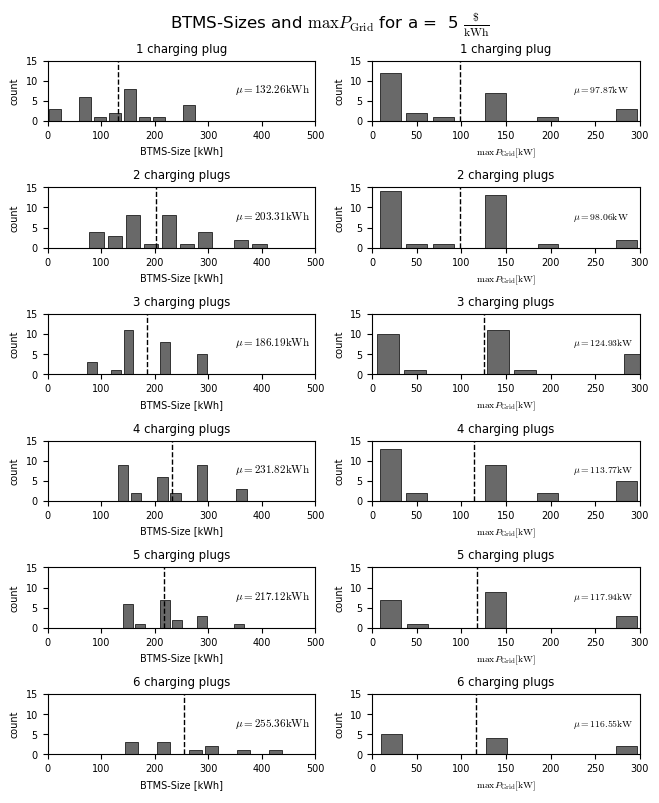

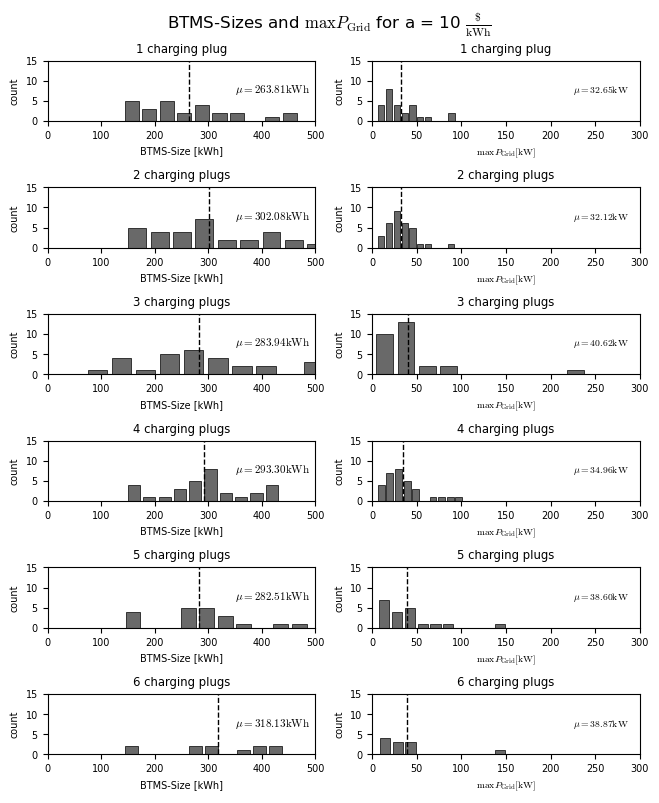

In [109]:
histogram_for_a_values = [5,10]

for a in histogram_for_a_values:
    df_btms_size = []
    a_idx = np.where(np.array(a_values) == a)[0][0]
    sizing_results_a_choosen = sizing_results[a_idx]
    for df in sizing_results_a_choosen:
        btms_size = df['param: btms size, a,b_sys,b_cap,b_loan,c'].iloc[0]
        P_Grid_max = df['P_Grid'].abs().max()
        numStalls = df_infrastructure.loc[int(df.name)]['numStalls']
        taz = df.name
        df_btms_size.append({'taz': taz, 'btms_size': btms_size, 'numStalls': numStalls, 'P_Grid_max': P_Grid_max})
    df_btms_size = pd.DataFrame(df_btms_size)
    df_btms_size = df_btms_size.set_index('numStalls')
    df_btms_size = df_btms_size.sort_index()

    fig, ax = plt.subplots(6,2, figsize=(plotSizeX2col, 3*plotSizeY2col)) #, sharey=True, sharex=True)
    plt.style.use('default')
    pltSettings()
    plt.grid(False)
    #ax = ax.flatten()

    fig.suptitle(r'BTMS-Sizes and $\max P_\mathrm{Grid}$ for a = %2.f $\frac{\$}{\mathrm{kWh}}$' % a, fontsize=12)
    
    j=0
    for i in range(0,6):
        ax[i,j].hist(df_btms_size.loc[i+1]['btms_size'], bins=10, color ='dimgrey', align='mid', edgecolor='black', linewidth=0.5, rwidth = 0.8)
        data_i = df_btms_size.loc[i+1]['btms_size']
        if i == 0:
            ax[i,j].set_title('1 charging plug')
        else:
            ax[i,j].set_title(str(i+1) + ' charging plugs')
        ax[i,j].axvline(data_i.mean(), color='k', linewidth=1, linestyle='dashed')
        # add text with mean
        ax[i,j].text(350, 7, r'$\mu=%.2f \mathrm{kWh}$' % data_i.mean(), fontsize = 8)
        ax[i,j].set_xlabel('BTMS-Size [kWh]')
        ax[i,j].set_ylabel('count')
        ax[i,j].set_xlim(0, 500)
        ax[i,j].set_ylim(0, 15)
    # plot P_Grid_max
    j=1
    for i in range(0,6):
        ax[i,j].hist(df_btms_size.loc[i+1]['P_Grid_max'], bins=10, color ='dimgrey', align='mid', edgecolor='black', linewidth=0.5, rwidth = 0.8)
        data_i = df_btms_size.loc[i+1]['P_Grid_max']
        if i == 0:
            ax[i,j].set_title('1 charging plug')
        else:
            ax[i,j].set_title(str(i+1) + ' charging plugs')
        ax[i,j].axvline(data_i.mean(), color='k', linewidth=1, linestyle='dashed')
        # add text with mean
        ax[i,j].text(225, 7, r'$\mu=%.2f \mathrm{kW}$' % data_i.mean(), fontsize = 7)
        ax[i,j].set_xlabel(r'$ \max P_\mathrm{Grid} [\mathrm{kW}]$', fontsize=7)
        ax[i,j].set_ylabel('count')
        ax[i,j].set_xlim(0, 300)
        ax[i,j].set_ylim(0, 15)

    fig.tight_layout()

    # save figure
    fig.savefig(os.path.join(figure_directory, 'a' + str(a) + 'histogram_btms_size.pdf'), dpi=300, bbox_inches='tight')
    